In [1]:
from pandas import read_csv
from matplotlib import pyplot as plt

import pandas as pd

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Smart Meter 65

In [2]:
p1 = read_csv('ics_data/06_Smart_Meter_45/P1.csv', squeeze=True, index_col=0)
p2 = read_csv('ics_data/06_Smart_Meter_45/P2.csv', squeeze=True, index_col=0)
p3 = read_csv('ics_data/06_Smart_Meter_45/P3.csv', squeeze=True, index_col=0)
q1 = read_csv('ics_data/06_Smart_Meter_45/Q1.csv', squeeze=True, index_col=0)
q2 = read_csv('ics_data/06_Smart_Meter_45/Q2.csv', squeeze=True, index_col=0)
q3 = read_csv('ics_data/06_Smart_Meter_45/Q3.csv', squeeze=True, index_col=0)
u1 = read_csv('ics_data/06_Smart_Meter_45/U1.csv', squeeze=True, index_col=0)
u2 = read_csv('ics_data/06_Smart_Meter_45/U2.csv', squeeze=True, index_col=0)
u3 = read_csv('ics_data/06_Smart_Meter_45/U3.csv', squeeze=True, index_col=0)

/Users/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
def mul_values(dataframe, num):
    new_dataframe = dataframe.copy()
    for (data_index, index) in enumerate(dataframe.index):
        if index > num:
            break
        else:
            new_dataframe.values[data_index] *= 18
    
    return new_dataframe

In [4]:
corner_value = 1560434439432

In [5]:
p1 = mul_values(p1, corner_value)
p2 = mul_values(p2, corner_value)
p3 = mul_values(p3, corner_value)
q1 = mul_values(q1, corner_value)
q2 = mul_values(q2, corner_value)
q3 = mul_values(q3, corner_value)

In [6]:
def convert_timestamps(df):
    df.index = pd.to_datetime(df.index, unit='ms')
    return df

In [7]:
p1 = convert_timestamps(p1)
p2 = convert_timestamps(p2)
p3 = convert_timestamps(p3)
q1 = convert_timestamps(q1)
q2 = convert_timestamps(q2)
q3 = convert_timestamps(q3)
u1 = convert_timestamps(u1)
u2 = convert_timestamps(u2)
u3 = convert_timestamps(u3)

In [8]:
def fix_timestamps(dataframes):
    # check input
    if len(dataframes) <= 0:
        return
    new_dataframes = []
    
    # get a full list of indices
    indices = dataframes[0].index
    for dataframe in dataframes:
        indices = indices.union(dataframe.index)
    print("Got all indices")
        
    for (data_index, dataframe) in enumerate(dataframes):
        dataframe = dataframe.reindex(indices, copy=True).fillna(method = 'ffill').fillna(method = 'bfill') 
        new_dataframes.append(dataframe)
        print("dataframe", data_index + 1, "is fixed")
        
    return new_dataframes

In [9]:
data_list = fix_timestamps([p1, p2, p3, q1, q2, q3, u1, u2, u3])
p1 = data_list[0]
p2 = data_list[1]
p3 = data_list[2]
q1 = data_list[3]
q2 = data_list[4]
q3 = data_list[5]
u1 = data_list[6]
u2 = data_list[7]
u3 = data_list[8]

Got all indices
dataframe 1 is fixed
dataframe 2 is fixed
dataframe 3 is fixed
dataframe 4 is fixed
dataframe 5 is fixed
dataframe 6 is fixed
dataframe 7 is fixed
dataframe 8 is fixed
dataframe 9 is fixed


## Save fixed data so we don't need to fix it again

In [ ]:
p1.to_csv("ics_data_fixed/Smart_Meter_65/P1.csv", header=True, index=True, encoding='utf-8')
p2.to_csv("ics_data_fixed/Smart_Meter_65/P2.csv", header=True, index=True, encoding='utf-8')
p3.to_csv("ics_data_fixed/Smart_Meter_65/P3.csv", header=True, index=True, encoding='utf-8')
q1.to_csv("ics_data_fixed/Smart_Meter_65/Q1.csv", header=True, index=True, encoding='utf-8')
q2.to_csv("ics_data_fixed/Smart_Meter_65/Q2.csv", header=True, index=True, encoding='utf-8')
q3.to_csv("ics_data_fixed/Smart_Meter_65/Q3.csv", header=True, index=True, encoding='utf-8')
u1.to_csv("ics_data_fixed/Smart_Meter_65/U1.csv", header=True, index=True, encoding='utf-8')
u2.to_csv("ics_data_fixed/Smart_Meter_65/U2.csv", header=True, index=True, encoding='utf-8')
u3.to_csv("ics_data_fixed/Smart_Meter_65/U3.csv", header=True, index=True, encoding='utf-8')

## Analyze data

In [10]:
p1 = read_csv('ics_data_fixed/Smart_Meter_65/P1.csv', squeeze=True, index_col=0)
p2 = read_csv('ics_data_fixed/Smart_Meter_65/P2.csv', squeeze=True, index_col=0)
p3 = read_csv('ics_data_fixed/Smart_Meter_65/P3.csv', squeeze=True, index_col=0)
q1 = read_csv('ics_data_fixed/Smart_Meter_65/Q1.csv', squeeze=True, index_col=0)
q2 = read_csv('ics_data_fixed/Smart_Meter_65/Q2.csv', squeeze=True, index_col=0)
q3 = read_csv('ics_data_fixed/Smart_Meter_65/Q3.csv', squeeze=True, index_col=0)
u1 = read_csv('ics_data_fixed/Smart_Meter_65/U1.csv', squeeze=True, index_col=0)
u2 = read_csv('ics_data_fixed/Smart_Meter_65/U2.csv', squeeze=True, index_col=0)
u3 = read_csv('ics_data_fixed/Smart_Meter_65/U3.csv', squeeze=True, index_col=0)

In [17]:
def print_stats(name, data):
    stat_data = data.describe()
    print('%s: mean = %f, std = %f, V = %f' % (name, stat_data['mean'], stat_data['std'], stat_data['std']/stat_data['mean']))

In [32]:
print_stats('P1', p1)
print_stats('P2', p2)
print_stats('P3', p3)
print_stats('Q1', q1)
print_stats('Q2', q2)
print_stats('Q3', q3)
print_stats('U1', u1)
print_stats('U2', u2)
print_stats('U3', u3)

P1: mean = 149.814455, std = 377.822221, V = 2.521934
P2: mean = 714.670359, std = 1367.540120, V = 1.913526
P3: mean = 198.845854, std = 432.449248, V = 2.174796
Q1: mean = 43.325689, std = 254.864294, V = 5.882521
Q2: mean = -84.715044, std = 794.930152, V = -9.383577
Q3: mean = 22.274691, std = 190.582656, V = 8.556018
U1: mean = 226.759258, std = 3.236852, V = 0.014274
U2: mean = 227.554605, std = 3.281116, V = 0.014419
U3: mean = 226.126805, std = 3.207982, V = 0.014187


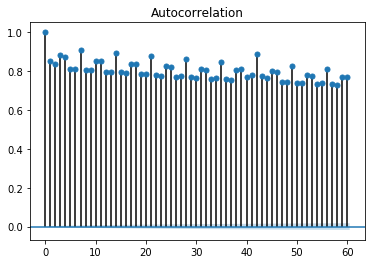

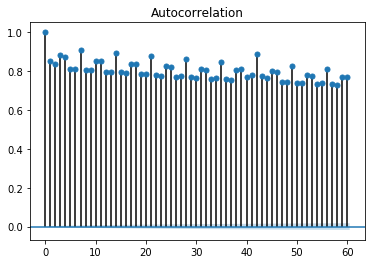

In [33]:
plot_acf(p1[:1_000_000])

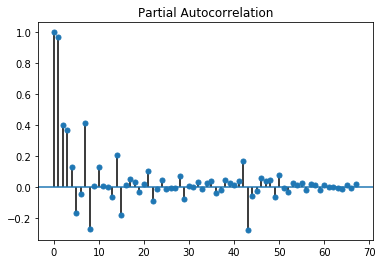

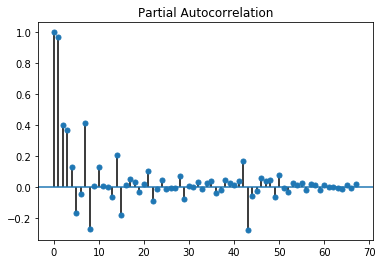

In [34]:
plot_pacf(p1)

Здесь заметна довольно четкая сезонность

In [35]:
# Correlation between P values
print('p1 and p2:', p1.corr(p2))
print('p2 and p3:', p2.corr(p3))
print('p1 and p3:', p1.corr(p3))

p1 and p2: 0.49764176166084906
p2 and p3: 0.4944709394309412
p1 and p3: 0.40836242275174717


In [36]:
# Correlation between Q values
print('q1 and q2:', q1.corr(q2))
print('q2 and q3:', q2.corr(q3))
print('q1 and q3:', q1.corr(q3))

q1 and q2: 0.24916510988620283
q2 and q3: 0.25181850303993636
q1 and q3: 0.782647417687114


In [37]:
# Correlation between U values
print('u1 and u2:', u1.corr(u2))
print('u2 and u3:', u2.corr(u3))
print('u1 and u3:', u1.corr(u3))

u1 and u2: 0.9977586682135696
u2 and u3: 0.9981499271891365
u1 and u3: 0.998190376819674


In [38]:
# Correlation between P, Q and R - 1st phase
print('p1 and q1:', p1.corr(q1))
print('p1 and u1:', p1.corr(u1))
print('q1 and u1:', q1.corr(u1))

p1 and q1: 0.3868353427300718
p1 and u1: -0.28551331480621606
q1 and u1: -0.0022305812421963226


In [39]:
# Correlation between P, Q and R - 2nd phase
print('p2 and q2:', p2.corr(q2))
print('p2 and u2:', p2.corr(u2))
print('q2 and u2:', q2.corr(u2))

p2 and q2: 0.43790715850097234
p2 and u2: -0.31741300853021104
q2 and u2: 0.04769677822517043


In [40]:
# Correlation between P, Q and R - 3rd phase
print('p3 and q3:', p3.corr(q3))
print('p3 and u3:', p3.corr(u3))
print('q3 and u3:', q3.corr(u3))

p3 and q3: 0.2468764249671468
p3 and u3: -0.19188312791932907
q3 and u3: -0.014311070078757992


Корелляция между P и Q ожидаемо высока, а корреляция этих параметров с U достаточно низкая
При этом на графиках автокорреляции четко видна сезонность

### By months

In [41]:
# We have 7 month of data
p1

ts
2019-05-14 21:00:00.251    6.12
2019-05-14 21:00:01.251    6.12
2019-05-14 21:00:03.251    6.12
2019-05-14 21:00:04.251    6.12
2019-05-14 21:00:05.251    6.12
                           ... 
2019-11-14 20:59:39.834    0.00
2019-11-14 20:59:44.834    0.00
2019-11-14 20:59:49.839    0.00
2019-11-14 20:59:54.839    0.00
2019-11-14 20:59:59.844    0.00
Name: P1, Length: 4768630, dtype: float64

In [15]:
month_numbers = ['05', '06', '07', '08', '09', '10', '11']
# month_numbers = ['05', '06']

In [16]:
months_p1 = [p1.loc['2019-' + i] for i in month_numbers]
months_p2 = [p2.loc['2019-' + i] for i in month_numbers]
months_p3 = [p3.loc['2019-' + i] for i in month_numbers]
months_q1 = [q1.loc['2019-' + i] for i in month_numbers]
months_q2 = [q2.loc['2019-' + i] for i in month_numbers]
months_q3 = [q3.loc['2019-' + i] for i in month_numbers]
months_u1 = [u1.loc['2019-' + i] for i in month_numbers]
months_u2 = [u2.loc['2019-' + i] for i in month_numbers]
months_u3 = [u3.loc['2019-' + i] for i in month_numbers]

#### Mean

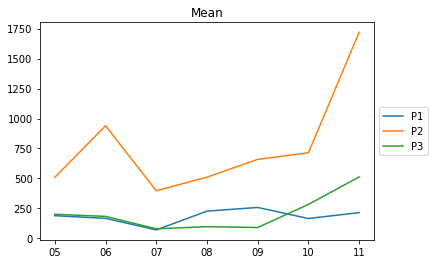

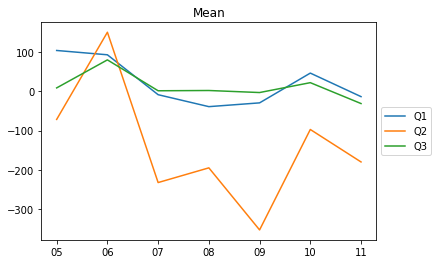

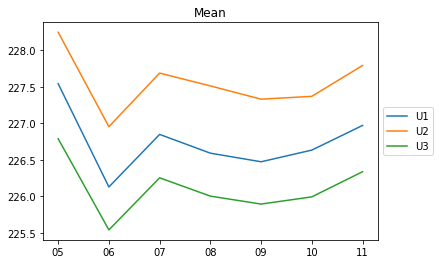

In [21]:
plt.figure()
plt.plot(month_numbers, [month.mean() for month in months_p1], label='P1')
plt.plot(month_numbers, [month.mean() for month in months_p2], label='P2') 
plt.plot(month_numbers, [month.mean() for month in months_p3], label='P3')
plt.title('Mean')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend()
plt.figure()
plt.plot(month_numbers, [month.mean() for month in months_q1], label='Q1')
plt.plot(month_numbers, [month.mean() for month in months_q2], label='Q2') 
plt.plot(month_numbers, [month.mean() for month in months_q3], label='Q3')
plt.title('Mean')
# plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.figure()
plt.plot(month_numbers, [month.mean() for month in months_u1], label='U1')
plt.plot(month_numbers, [month.mean() for month in months_u2], label='U2') 
plt.plot(month_numbers, [month.mean() for month in months_u3], label='U3')
plt.title('Mean')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend()

#### Variance

Text(0.5, 1.0, 'Variance')

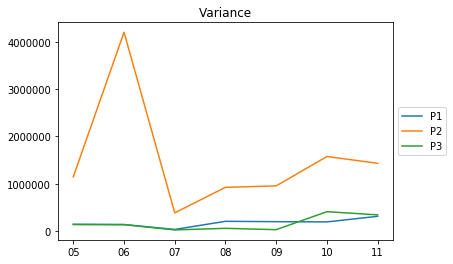

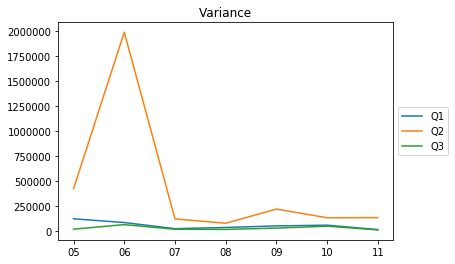

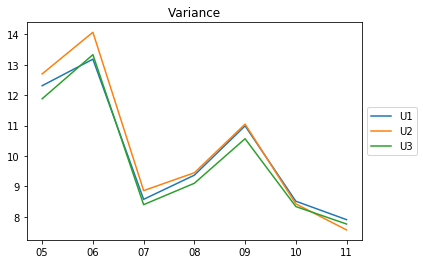

In [23]:
plt.figure()
plt.plot(month_numbers, [month.var() for month in months_p1], label='P1')
plt.plot(month_numbers, [month.var() for month in months_p2], label='P2') 
plt.plot(month_numbers, [month.var() for month in months_p3], label='P3')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Variance')
# plt.legend()
plt.figure()
plt.plot(month_numbers, [month.var() for month in months_q1], label='Q1')
plt.plot(month_numbers, [month.var() for month in months_q2], label='Q2') 
plt.plot(month_numbers, [month.var() for month in months_q3], label='Q3')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Variance')
# plt.legend()
plt.figure()
plt.plot(month_numbers, [month.var() for month in months_u1], label='U1')
plt.plot(month_numbers, [month.var() for month in months_u2], label='U2') 
plt.plot(month_numbers, [month.var() for month in months_u3], label='U3')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Variance')
# plt.legend()

Немного предварительных выводов:
1. Четкой сезонности и четкого тренда по месяцам не видно (возможно, из-за того, что данные были взяты в срок меньше года), но существиет разница в параметрах между месяцами
2. Существует довольно большая разница в значениях между фазами, причем для P и Q эта разница местами довольно велика и не одинакова. Вероятно, это связано с особенностями работы счетчика.
3. Очень похожие графики для трех фаз напряжения (и среднее, и std). Вероятно, отличия между ними обусловлены особенностью работы счетчика

In [12]:
for month in months_p1:
    result = adfuller(month)
    print ('adf: ', result[0] )
    print ('p-value: ', result[1])
    print('Critical values: ', result[4])
    if result[0]> result[4]['5%']: 
        print ('есть единичные корни, ряд не стационарен \n')
    else:
        print ('единичных корней нет, ряд стационарен \n')

adf:  -20.782808876089526
p-value:  0.0
Critical values:  {'1%': -3.430357956984531, '5%': -2.8615435168965413, '10%': -2.5667718719150314}
единичных корней нет, ряд стационарен 

adf:  -27.860855699408894
p-value:  0.0
Critical values:  {'1%': -3.430355878876253, '5%': -2.86154259839726, '10%': -2.566771383031395}
единичных корней нет, ряд стационарен 

adf:  -53.48932791600386
p-value:  0.0
Critical values:  {'1%': -3.4303548388955067, '5%': -2.861542138737828, '10%': -2.5667711383715024}
единичных корней нет, ряд стационарен 

adf:  -9.83197068814729
p-value:  5.0094192367671296e-17
Critical values:  {'1%': -3.4303879749335415, '5%': -2.8615567844032257, '10%': -2.5667789337369973}
единичных корней нет, ряд стационарен 

adf:  -5.434466004844598
p-value:  2.8660438159644546e-06
Critical values:  {'1%': -3.4306406558005498, '5%': -2.861668460435025, '10%': -2.5668383758428024}
единичных корней нет, ряд стационарен 

adf:  -22.990058328640302
p-value:  0.0
Critical values:  {'1%': -3.

In [13]:
def run_adfuller(dataframe):
    result = adfuller(dataframe)
    print ('adf: ', result[0] )
    print ('p-value: ', result[1])
    print('Critical values: ', result[4])
    if result[0]> result[4]['5%']: 
        print ('есть единичные корни, ряд не стационарен \n')
    else:
        print ('единичных корней нет, ряд стационарен \n')

In [13]:
run_adfuller(months_p2[0])

adf:  -9.880860502855334
p-value:  3.773411303383034e-17
Critical values:  {'1%': -3.430357956984531, '5%': -2.8615435168965413, '10%': -2.5667718719150314}
единичных корней нет, ряд стационарен 



In [ ]:
run_adfuller(months_p2[1])

In [ ]:
run_adfuller(months_p2[2])

In [ ]:
run_adfuller(months_p2[3])

In [ ]:
run_adfuller(months_p2[4])
run_adfuller(months_p2[5])
run_adfuller(months_p2[6])

# adf:  -2.7625376822574443
# p-value:  0.0638274489870866
# Critical values:  {'1%': -3.430640565396129, '5%': -2.861668420481159, '10%': -2.566838354576154}
# есть единичные корни, ряд не стационарен

# adf:  -11.556099863812438
# p-value:  3.3561579126773394e-21
# Critical values:  {'1%': -3.4303572163969696, '5%': -2.8615431895656718, '10%': -2.5667716976887465}
# единичных корней нет, ряд стационарен 

# adf:  -14.296505001871903
# p-value:  1.2498226114714948e-26
# Critical values:  {'1%': -3.430367143024934, '5%': -2.8615475770100507, '10%': -2.5667740329665754}
# единичных корней нет, ряд стационарен 

In [12]:
for month in months_p3:
    result = adfuller(month)
    print ('adf: ', result[0] )
    print ('p-value: ', result[1])
    print('Critical values: ', result[4])
    if result[0]> result[4]['5%']: 
        print ('есть единичные корни, ряд не стационарен \n')
    else:
        print ('единичных корней нет, ряд стационарен \n')

adf:  -16.0152954059666
p-value:  6.29047328880011e-29
Critical values:  {'1%': -3.430357956984531, '5%': -2.8615435168965413, '10%': -2.5667718719150314}
единичных корней нет, ряд стационарен 

adf:  -25.644641170041982
p-value:  0.0
Critical values:  {'1%': -3.430355878876253, '5%': -2.86154259839726, '10%': -2.566771383031395}
единичных корней нет, ряд стационарен 

adf:  -52.99985811089278
p-value:  0.0
Critical values:  {'1%': -3.4303548388955067, '5%': -2.861542138737828, '10%': -2.5667711383715024}
единичных корней нет, ряд стационарен 

adf:  -13.476038796019894
p-value:  3.3107313637068522e-25
Critical values:  {'1%': -3.43038797515407, '5%': -2.8615567845006957, '10%': -2.566778933788877}
единичных корней нет, ряд стационарен 

adf:  -10.420626464472216
p-value:  1.7084215129411177e-18
Critical values:  {'1%': -3.4306406299649757, '5%': -2.8616684490170985, '10%': -2.566838369765267}
единичных корней нет, ряд стационарен 

adf:  -10.567289671732462
p-value:  7.460043425955119

In [13]:
for month in months_q1:
    result = adfuller(month)
    print ('adf: ', result[0] )
    print ('p-value: ', result[1])
    print('Critical values: ', result[4])
    if result[0]> result[4]['5%']: 
        print ('есть единичные корни, ряд не стационарен \n')
    else:
        print ('единичных корней нет, ряд стационарен \n')

adf:  -9.312185912989682
p-value:  1.0418711764837039e-15
Critical values:  {'1%': -3.430357956984531, '5%': -2.8615435168965413, '10%': -2.5667718719150314}
единичных корней нет, ряд стационарен 

adf:  -9.327271279458165
p-value:  9.535843036635436e-16
Critical values:  {'1%': -3.430355878876253, '5%': -2.86154259839726, '10%': -2.566771383031395}
единичных корней нет, ряд стационарен 

adf:  -13.093688661575435
p-value:  1.7671281795446555e-24
Critical values:  {'1%': -3.430354838891926, '5%': -2.8615421387362456, '10%': -2.56677113837066}
единичных корней нет, ряд стационарен 

adf:  -8.835996829918045
p-value:  1.7185757766208954e-14
Critical values:  {'1%': -3.4303879749335415, '5%': -2.8615567844032257, '10%': -2.5667789337369973}
единичных корней нет, ряд стационарен 

adf:  -4.367188076284402
p-value:  0.00033913869443213853
Critical values:  {'1%': -3.4306406299649757, '5%': -2.8616684490170985, '10%': -2.566838369765267}
единичных корней нет, ряд стационарен 

adf:  -10.2688

In [ ]:
run_adfuller(months_q2[0])
# adf:  -11.100297493258267
# p-value:  3.880464009790197e-20
# Critical values:  {'1%': -3.430357956984531, '5%': -2.8615435168965413, '10%': -2.5667718719150314}
# единичных корней нет, ряд стационарен 

In [ ]:
run_adfuller(months_q2[1])

In [ ]:
run_adfuller(months_q2[2])

In [ ]:
run_adfuller(months_q2[3])
# adf:  -8.640396511512348
# p-value:  5.445847070542084e-14
# Critical values:  {'1%': -3.43038797515407, '5%': -2.8615567845006957, '10%': -2.566778933788877}
# единичных корней нет, ряд стационарен 

In [ ]:
run_adfuller(months_q2[4])
# adf:  -3.4233329845031295
# p-value:  0.010188707765015124
# Critical values:  {'1%': -3.4306406558005498, '5%': -2.861668460435025, '10%': -2.5668383758428024}
# единичных корней нет, ряд стационарен 

In [ ]:
run_adfuller(months_q2[5])
# adf:  -13.271980845857339
# p-value:  8.003414957841282e-25
# Critical values:  {'1%': -3.430357216389006, '5%': -2.861543189562152, '10%': -2.566771697686873}
# единичных корней нет, ряд стационарен 

In [ ]:
run_adfuller(months_q2[6])
# adf:  -8.002716647344515
# p-value:  2.3108485688167445e-12
# Critical values:  {'1%': -3.4303671430698754, '5%': -2.861547577029914, '10%': -2.566774032977148}
# единичных корней нет, ряд стационарен 

In [ ]:
run_adfuller(months_q3[0])
# adf:  -16.228867989028206
# p-value:  3.8298913854328023e-29
# Critical values:  {'1%': -3.430357956984531, '5%': -2.8615435168965413, '10%': -2.5667718719150314}
# единичных корней нет, ряд стационарен 

In [ ]:
run_adfuller(months_q3[1])
# adf:  -10.604319212235815
# p-value:  6.05759734187203e-19
# Critical values:  {'1%': -3.430355878876253, '5%': -2.86154259839726, '10%': -2.566771383031395}
# единичных корней нет, ряд стационарен 

In [ ]:
run_adfuller(months_q3[2])

In [ ]:
run_adfuller(months_q3[3])
# adf:  -9.593595314337449
# p-value:  2.0056093777585438e-16
# Critical values:  {'1%': -3.430387970964461, '5%': -2.8615567826489574, '10%': -2.566778932803261}
# единичных корней нет, ряд стационарен 

In [ ]:
run_adfuller(months_q3[4])
# adf:  -4.307107389340976
# p-value:  0.000431790545838469
# Critical values:  {'1%': -3.430640384755896, '5%': -2.86166834064794, '10%': -2.566838312082519}
# единичных корней нет, ряд стационарен 

In [ ]:
run_adfuller(months_q3[5])
# adf:  -6.697411829179403
# p-value:  3.967306637438502e-09
# Critical values:  {'1%': -3.430357216341225, '5%': -2.8615431895410333, '10%': -2.566771697675632}
# единичных корней нет, ряд стационарен 

In [ ]:
run_adfuller(months_q3[6])
# adf:  -9.632439803594028
# p-value:  1.598872013075045e-16
# Critical values:  {'1%': -3.4303671430698754, '5%': -2.861547577029914, '10%': -2.566774032977148}
# единичных корней нет, ряд стационарен 

In [ ]:
run_adfuller(months_u1[0])
# adf:  -5.222235454322759
# p-value:  7.9181199288127e-06
# Critical values:  {'1%': -3.430357956974849, '5%': -2.861543516892262, '10%': -2.5667718719127537}
# единичных корней нет, ряд стационарен 

In [ ]:
run_adfuller(months_u1[1])

In [ ]:
run_adfuller(months_u1[2])

In [ ]:
run_adfuller(months_u1[3])
# adf:  -6.651345271538119
# p-value:  5.111615307681683e-09
# Critical values:  {'1%': -3.43038797515407, '5%': -2.8615567845006957, '10%': -2.566778933788877}
# единичных корней нет, ряд стационарен 

In [ ]:
run_adfuller(months_u1[4])
# adf:  -2.676701899287078
# p-value:  0.07815735287005449
# Critical values:  {'1%': -3.4306403976513207, '5%': -2.8616683463470207, '10%': -2.5668383151160263}
# есть единичные корни, ряд не стационарен 

In [ ]:
run_adfuller(months_u1[5])
# adf:  -4.945289399542398
# p-value:  2.8445470792583415e-05
# Critical values:  {'1%': -3.4303572163651155, '5%': -2.8615431895515924, '10%': -2.5667716976812525}
# единичных корней нет, ряд стационарен 

In [ ]:
run_adfuller(months_u1[6])
# adf:  -3.732062717571794
# p-value:  0.003684111523125982
# Critical values:  {'1%': -3.4303671422160327, '5%': -2.861547576652527, '10%': -2.5667740327762782}
# единичных корней нет, ряд стационарен 

In [ ]:
run_adfuller(months_u2[0])
# adf:  -5.114644186788854
# p-value:  1.3098967560374234e-05
# Critical values:  {'1%': -3.430357956965167, '5%': -2.861543516887983, '10%': -2.566771871910476}
# единичных корней нет, ряд стационарен 

In [ ]:
run_adfuller(months_u2[1])

In [ ]:
run_adfuller(months_u2[2])

In [ ]:
run_adfuller(months_u2[3])
# adf:  -6.640039869860539
# p-value:  5.4389332378711294e-09
# Critical values:  {'1%': -3.430387973610422, '5%': -2.8615567838184286, '10%': -2.5667789334257303}
# единичных корней нет, ряд стационарен 

In [ ]:
run_adfuller(months_u2[4])
# adf:  -2.6767764024406135
# p-value:  0.07814389959175594
# Critical values:  {'1%': -3.4306403976513207, '5%': -2.8616683463470207, '10%': -2.5668383151160263}
# есть единичные корни, ряд не стационарен 

In [ ]:
run_adfuller(months_u2[5])
# adf:  -4.96408032999562
# p-value:  2.6127602002476144e-05
# Critical values:  {'1%': -3.430357216373079, '5%': -2.861543189555112, '10%': -2.566771697683126}
# единичных корней нет, ряд стационарен 

In [ ]:
run_adfuller(months_u2[6])
# adf:  -3.7954488170093614
# p-value:  0.0029542242984148225
# Critical values:  {'1%': -3.430367142935052, '5%': -2.8615475769703242, '10%': -2.56677403294543}
# единичных корней нет, ряд стационарен 

In [ ]:
run_adfuller(months_u3[0])
# adf:  -5.271403211445335
# p-value:  6.2740930894729515e-06
# Critical values:  {'1%': -3.430357956955485, '5%': -2.861543516883703, '10%': -2.566771871908198}
# единичных корней нет, ряд стационарен 

In [ ]:
run_adfuller(months_u3[1])

In [ ]:
run_adfuller(months_u3[2])

In [ ]:
run_adfuller(months_u3[3])
# adf:  -6.718196186377709
# p-value:  3.5376978435163967e-09
# Critical values:  {'1%': -3.4303879747130153, '5%': -2.8615567843057566, '10%': -2.566778933685118}
# единичных корней нет, ряд стационарен 

In [ ]:
run_adfuller(months_u3[4])
# adf:  -2.715822020650574
# p-value:  0.07134015772181304
# Critical values:  {'1%': -3.4306403976513207, '5%': -2.8616683463470207, '10%': -2.5668383151160263}
# есть единичные корни, ряд не стационарен 

In [ ]:
run_adfuller(months_u3[5])
# adf:  -5.042326757245978
# p-value:  1.828787836582908e-05
# Critical values:  {'1%': -3.4303572162536278, '5%': -2.8615431895023162, '10%': -2.5667716976550246}
# единичных корней нет, ряд стационарен 

In [ ]:
run_adfuller(months_u3[6])
# adf:  -3.7215610469562685
# p-value:  0.0038198997001293324
# Critical values:  {'1%': -3.4303671426204736, '5%': -2.8615475768312844, '10%': -2.5667740328714244}
# единичных корней нет, ряд стационарен 

AttributeError: 'numpy.ndarray' object has no attribute 'grid'

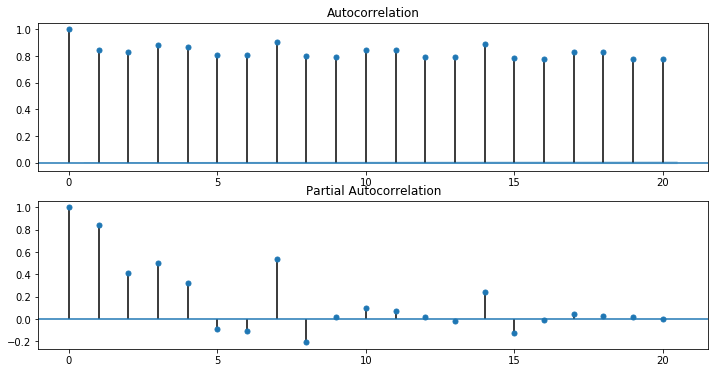

In [14]:
fig, ax = plt.subplots(2, figsize=(12,6))
ax[0] = plot_acf(months_p1[0], ax=ax[0], lags=20)
ax[1] = plot_pacf(months_p1[0], ax=ax[1], lags=20)
ax.grid(axis='y')

### By working days/holidays

In [13]:
holidays = [['18', '19', '25', '26'], 
            ['01', '02', '08', '09', '15', '16', '22', '23', '29', '30'], 
            ['06', '07', '13', '14', '20', '21', '27', '28'], 
            ['03', '04', '10', '11', '17', '18', '24', '25', '31'], 
            ['01', '07', '08', '14', '15', '21', '22', '28', '29'], 
            ['05', '06', '12', '13', '19', '20', '26', '27'], 
            ['02', '03', '09', '10']]

In [14]:
all_weekends = [month+'-'+day for (month, days) in zip(month_numbers, holidays) for day in days]

In [15]:
holidays_p1 = pd.concat([p1.loc['2019-' + month + '-' + day] for (month, days) in zip(month_numbers, holidays) for day in days])
combined = p1.append(holidays_p1)
working_days_p1 = combined[~combined.index.duplicated(keep=False)]
print("separated P1")

holidays_p2 = pd.concat([p2.loc['2019-' + month + '-' + day] for (month, days) in zip(month_numbers, holidays) for day in days])
combined = p2.append(holidays_p2)
working_days_p2 = combined[~combined.index.duplicated(keep=False)]
print("separated P2")

holidays_p3 = pd.concat([p3.loc['2019-' + month + '-' + day] for (month, days) in zip(month_numbers, holidays) for day in days])
combined = p3.append(holidays_p3)
working_days_p3 = combined[~combined.index.duplicated(keep=False)]
print("separated P3")

holidays_q1 = pd.concat([q1.loc['2019-' + month + '-' + day] for (month, days) in zip(month_numbers, holidays) for day in days])
combined = q1.append(holidays_q1)
working_days_q1 = combined[~combined.index.duplicated(keep=False)]
print("separated Q1")

holidays_q2 = pd.concat([q2.loc['2019-' + month + '-' + day] for (month, days) in zip(month_numbers, holidays) for day in days])
combined = q2.append(holidays_q2)
working_days_q2 = combined[~combined.index.duplicated(keep=False)]
print("separated Q2")

holidays_q3 = pd.concat([q3.loc['2019-' + month + '-' + day] for (month, days) in zip(month_numbers, holidays) for day in days])
combined = q3.append(holidays_q3)
working_days_q3 = combined[~combined.index.duplicated(keep=False)]
print("separated Q3")

holidays_u1 = pd.concat([u1.loc['2019-' + month + '-' + day] for (month, days) in zip(month_numbers, holidays) for day in days])
combined = u1.append(holidays_u1)
working_days_u1 = combined[~combined.index.duplicated(keep=False)]
print("separated U1")

holidays_u2 = pd.concat([u2.loc['2019-' + month + '-' + day] for (month, days) in zip(month_numbers, holidays) for day in days])
combined = u2.append(holidays_u2)
working_days_u2 = combined[~combined.index.duplicated(keep=False)]
print("separated U2")

holidays_u3 = pd.concat([u3.loc['2019-' + month + '-' + day] for (month, days) in zip(month_numbers, holidays) for day in days])
combined = u3.append(holidays_u3)
working_days_u3 = combined[~combined.index.duplicated(keep=False)]
print("separated U3")

separated P1
separated P2
separated P3
separated Q1
separated Q2
separated Q3
separated U1
separated U2
separated U3


In [18]:
print_stats('P1 - holidays ', holidays_p1)
print_stats('P1 - working days ', working_days_p1)
print_stats('P2 - holidays ', holidays_p2)
print_stats('P2 - working days ', working_days_p2)
print_stats('P3 - holidays ', holidays_p3)
print_stats('P3 - working days ', working_days_p3)

/Users/anna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


P1 - holidays : mean = 0.000000, std = 0.000000, V = nan
P1 - working days : mean = 171.809218, std = 399.910345, V = 2.327642
P2 - holidays : mean = 170.228246, std = 924.265281, V = 5.429565
P2 - working days : mean = 794.601734, std = 1403.355557, V = 1.766112
P3 - holidays : mean = 49.098265, std = 107.525202, V = 2.190000
P3 - working days : mean = 220.830801, std = 457.160075, V = 2.070183


In [19]:
print_stats('Q1 - holidays ', holidays_q1)
print_stats('Q1 - working days ', working_days_q1)
print_stats('Q2 - holidays ', holidays_q2)
print_stats('Q2 - working days ', working_days_q2)
print_stats('Q3 - holidays ', holidays_q3)
print_stats('Q3 - working days ', working_days_q3)

Q1 - holidays : mean = 0.000000, std = 0.000000, V = nan


/Users/anna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


Q1 - working days : mean = 49.686480, std = 272.352980, V = 5.481430
Q2 - holidays : mean = 76.437839, std = 965.910346, V = 12.636547
Q2 - working days : mean = -108.374440, std = 763.767427, V = -7.047487
Q3 - holidays : mean = -2.700019, std = 52.166031, V = -19.320619
Q3 - working days : mean = 25.941312, std = 202.853960, V = 7.819726


In [20]:
print_stats('U1 - holidays ', holidays_u1)
print_stats('U1 - working days ', working_days_u1)
print_stats('U2 - holidays ', holidays_u2)
print_stats('U2 - working days ', working_days_u2)
print_stats('U3 - holidays ', holidays_u3)
print_stats('U3 - working days ', working_days_u3)

U1 - holidays : mean = 226.689920, std = 2.629432, V = 0.011599
U1 - working days : mean = 226.769438, std = 3.316556, V = 0.014625
U2 - holidays : mean = 227.528167, std = 2.641638, V = 0.011610
U2 - working days : mean = 227.558487, std = 3.364767, V = 0.014786
U3 - holidays : mean = 226.074500, std = 2.574034, V = 0.011386
U3 - working days : mean = 226.134484, std = 3.290719, V = 0.014552


Из полученных результатов можно сделать вывод, что значения мощности (P и Q) на выходных в среднем ниже, чем по рабочим дням
В данных напряжения наблюдается противоположный результат, однако различия между значениями малы.
#### Из сказанного выше можно сделать вывод, что в данных есть сезонная составляющая